In [1]:
!pip install networkx
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 9.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e6ae746575b5f626d7c0280590002d87f2d259b16cdaf73c72fdfdd5b9105646
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# переменные для задачи - автомобиль (скорость, температура, потребление)
speed = ctrl.Antecedent(np.arange(0, 200, 1), 'speed')
temperature = ctrl.Antecedent(np.arange(16, 30, 1), 'temperature')
consumption = ctrl.Consequent(np.arange(5, 25, 1), 'consumption')


# используем стандартную функцию принадлежности (треугольник)
consumption.automf(names=['small', 'medium', 'large'])



speed['small'] = fuzz.trapmf(speed.universe, [0, 0, 30, 60])
speed['medium'] = fuzz.trapmf(speed.universe, [50, 70, 120, 150])
speed['high'] = fuzz.trapmf(speed.universe, [110, 140, 200, 200])

temperature['low'] = fuzz.trapmf(temperature.universe, [16, 16, 20, 25])
temperature['high'] = fuzz.trapmf(temperature.universe,[20, 25, 30, 50])
temperature

Antecedent: temperature

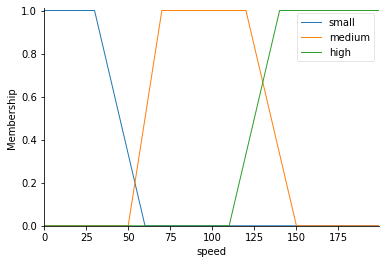

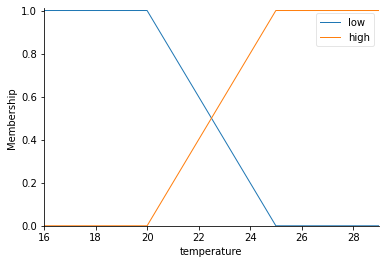

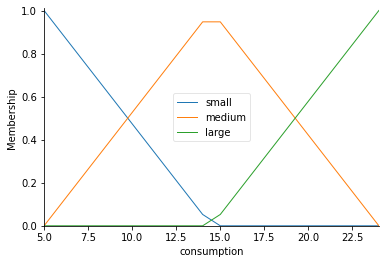

In [14]:
speed.view()
temperature.view()
consumption.view()

In [15]:
rule1 = ctrl.Rule(speed['small'] & temperature['low'], consumption['small'])
rule2 = ctrl.Rule(speed['small'] & temperature['high'], consumption['small'])
rule3 = ctrl.Rule(speed['medium'] & temperature['low'], consumption['large'])
rule4 = ctrl.Rule(speed['medium'] & temperature['high'], consumption['medium'])
rule5 = ctrl.Rule(speed['high'] & temperature['low'], consumption['large'])
rule6 = ctrl.Rule(speed['high'] & temperature['high'], consumption['large'])

In [18]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
consumption_simulator= ctrl.ControlSystemSimulation(consumption_ctrl)

#Entrada de valores de velocidade e temperatura
consumption_simulator.input['speed'] = 110
consumption_simulator.input['temperature'] = 22

#Resultado computado
consumption_simulator.compute()
print(consumption_simulator.output['consumption'])

16.17150182161652


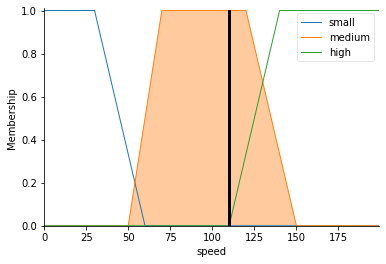

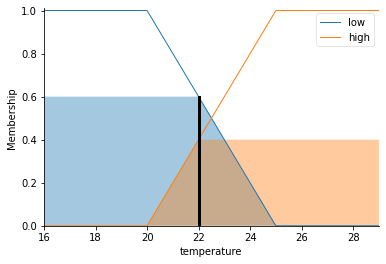

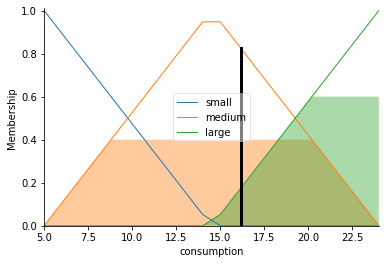

In [19]:
speed.view(sim=consumption_simulator)
temperature.view(sim=consumption_simulator)
consumption.view(sim=consumption_simulator)